In [57]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

### Loading the saved model

In [58]:
model = tf.keras.models.load_model(
    'trained_model.h5', 
)

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [60]:
import cv2

In [61]:
img_path = (r'D:\Plant Disease Detection System\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\test\test\AppleCedarRust3.JPG')

In [62]:
img = cv2.imread(img_path)

In [63]:
# cv2.imshow('window',img)

([], [])

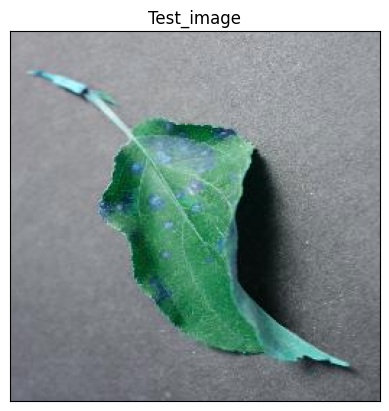

In [64]:
plt.imshow(img)
plt.title("Test_image")
plt.xticks([])
plt.yticks([])

#### Converting the image from BGR to RGB format

In [65]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

([], [])

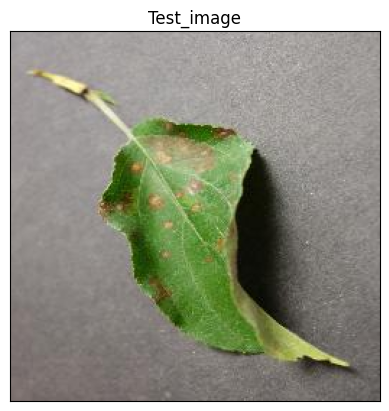

In [66]:
plt.imshow(img)
plt.title("Test_image")
plt.xticks([])
plt.yticks([])

### Preprocessing

In [67]:
img = tf.keras.preprocessing.image.load_img(img_path, False, "rgb", (128, 128))

In [68]:
input_arr = tf.keras.preprocessing.image.img_to_array(img)
input_arr = np.array([input_arr])

#### Converting a single image to batch of image 
##### If not done we will get the following error: "transpose expects a vector of size 3. But input(1) is a vector of size 4"

In [69]:
print(input_arr.shape)

(1, 128, 128, 3)


In [70]:
predictions = model.predict(input_arr)

1/1 [==============================] - 0s 178ms/step


In [71]:
predictions 

array([[1.05682645e-08, 1.24511246e-07, 9.99902368e-01, 1.09413778e-09,
        6.40579998e-08, 3.73618900e-06, 5.32927036e-10, 5.47269297e-09,
        4.62263804e-11, 4.81187645e-10, 1.41513502e-11, 5.88771565e-09,
        3.93626003e-08, 2.84790837e-11, 5.09940050e-12, 4.89835301e-08,
        4.41630727e-05, 3.07612886e-08, 4.80623858e-05, 4.94129324e-08,
        4.79112416e-10, 4.55541294e-09, 1.90762712e-08, 1.29422306e-09,
        8.45448225e-11, 1.17054685e-10, 3.53902259e-08, 3.92958548e-11,
        3.67696146e-07, 5.23964957e-07, 7.40839852e-08, 6.90353019e-08,
        5.64814862e-09, 1.01521440e-08, 8.94723584e-08, 1.30037012e-08,
        1.63396265e-08, 7.38358219e-09]], dtype=float32)

In [72]:
result = np.argmax(predictions)
result

2

In [73]:
class_names = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

#### Doing model prediction

Text(0.5, 1.0, 'Disease_Name: Apple___Cedar_apple_rust')

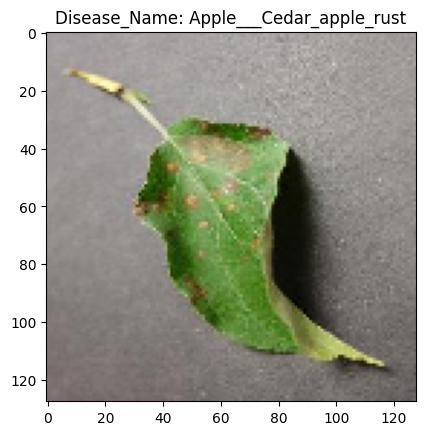

In [74]:
model_prediction = class_names[result]
model_prediction
plt.imshow(img)
plt.title(f"Disease_Name: {model_prediction}")